<a href="https://colab.research.google.com/github/reysilvaa/machine-learning/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRAKTIKUM 1**

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

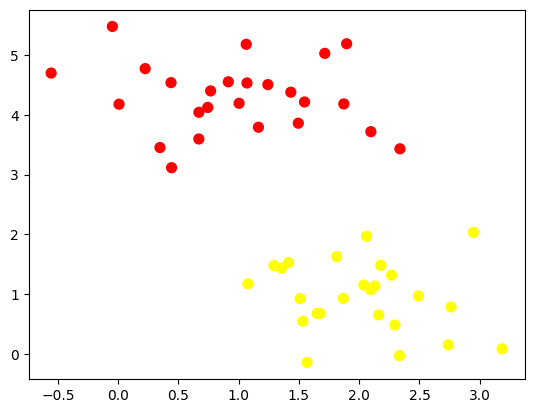

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

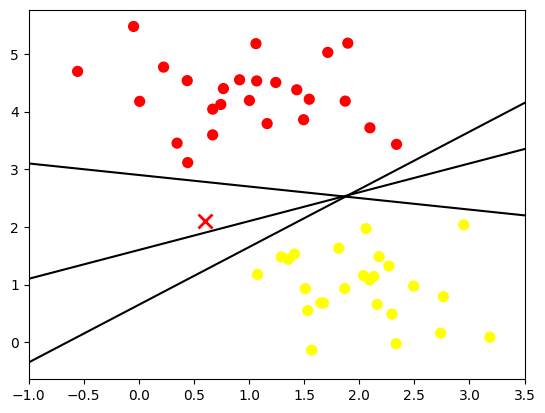

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

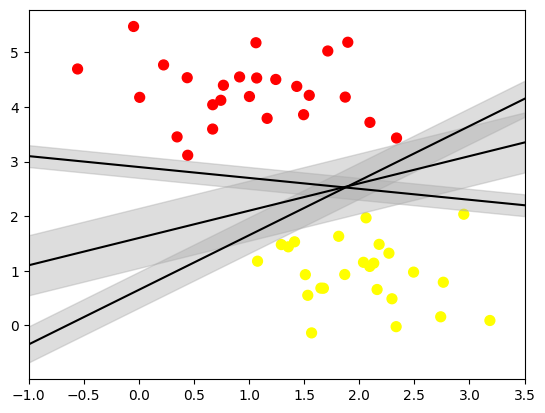

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

### **Penerappan fitting SVM**

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

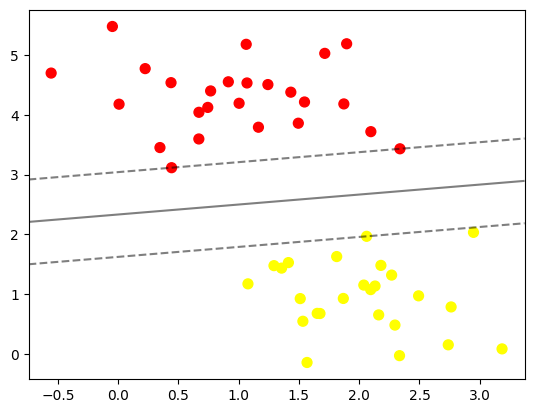

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [ ]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

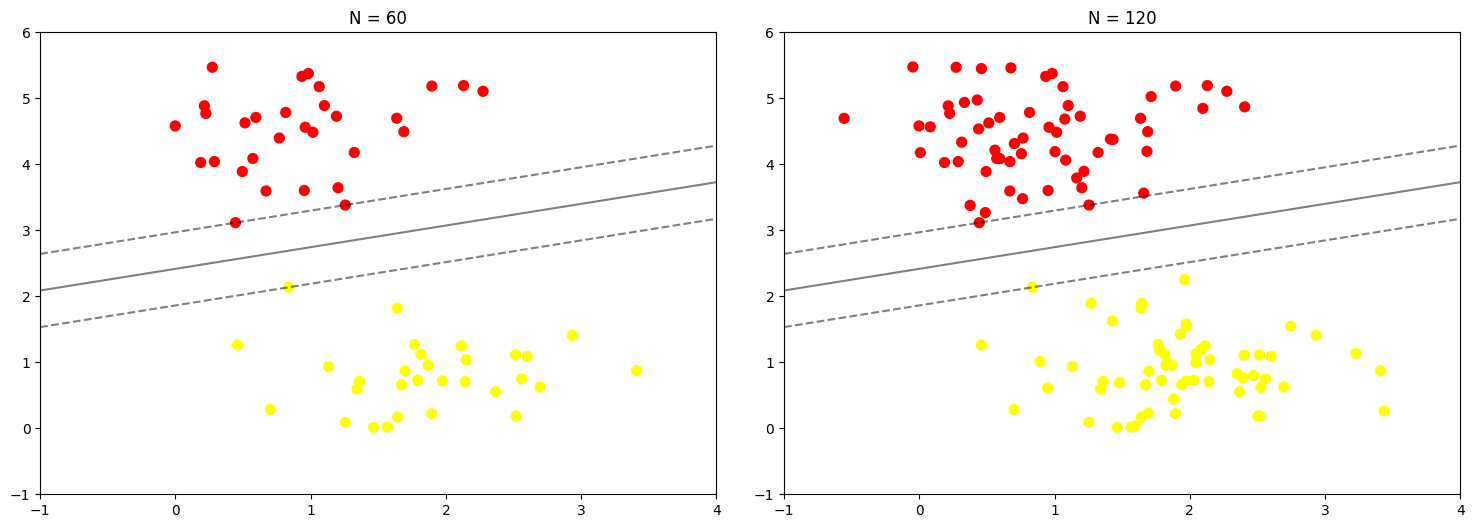

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

### **Data Tidak Terpisah Secara Linier**



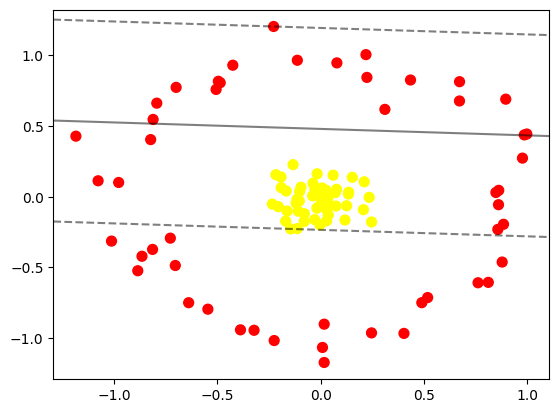

In [ ]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [ ]:
r = np.exp(-(X ** 2).sum(1))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.191906  ,  0.13915995],
       [ 0.13419278,  0.01890587],
       [-0.22768128,  1.20330566],
       [ 0.67156541,  0.8130791 ],
       [ 0.13541787,  0.03152288],
       [-0.16672624,  0.04039196],
       [ 0.07826561,  0.94586178],
       [-0.01302619, -0.07400386],
       [-0.97722126,  0.10063688],
       [-0.16264187, -0.1010741 ],
       [ 0.15271338,  0.13695733],
       [ 0.31045598,  0.61735384],
       [ 0.02873801, -0.17053708],
       [ 0.87775361, -0.46185097],
       [ 0.98482387,  0.43684804],
       [ 0.97589439,  0.27288675],
       [-0.02879621, -0.16198549],
       [-0.19095377,  0.06413548],
       [-1.01176375, -0.31360884],
       [-0.10210488,  0.03724753],
       [ 0.12540207, -0.06358877],
       [ 0.21888699,  1.00423222],
       [ 0.02456174,  0.04632757],
       [ 0.99684596,  0.44316556],
       [ 0.03670652, -0.12869258],
       [ 0.76101785, -0.60825755],
       [ 0.86104619,  0.04499867],
       [-0.82240001,  0.40372673],
       [-0.38804146, -0.94095655],
       [-0.81069874,  0.54630056],
       [-0.11327284, -0.22556861],
       [ 0.43438678,  0.82496049],
       [ 0.23441882, -0.00448134],
       [ 0.03398497, -0.01776501],
       [-0.13378218,  0.22670277],
       [-0.69924982,  0.77284084],
       [ 0.00181604, -0.01125406],
       [-0.00273381,  0.0496769 ],
       [ 0.02700226, -0.04986578],
       [-0.10892179, -0.10214239],
       [-0.70332735, -0.48613838],
       [-0.01716457,  0.16210675],
       [ 0.20669065, -0.09162156],
       [ 0.07637357,  0.05247989],
       [ 0.88423881, -0.19488068],
       [ 0.81061749, -0.60542607],
       [-0.03738747,  0.09511313],
       [-0.14576663, -0.2277171 ],
       [ 0.21039498,  0.1053545 ],
       [-0.02802559,  0.05422803],
       [-0.1149127 , -0.01843229],
       [-0.22501251, -1.01675849],
       [-0.50589341,  0.75835746],
       [ 0.85680047, -0.23096842],
       [ 0.24590787, -0.17845147],
       [ 0.01685939, -0.90089653],
       [-0.08009027, -0.17462916],
       [ 0.6712508 ,  0.67670065],
       [-1.18411042,  0.42794862],
       [-0.00350776, -0.19845893],
       [-1.07670128,  0.1126223 ],
       [-0.01829616, -0.08135527],
       [ 0.07079379,  0.02929087],
       [ 0.06033945,  0.15213226],
       [-0.09540263,  0.06718483],
       [ 0.02873862, -0.08827127],
       [-0.72731617, -0.29289924],
       [-0.233882  , -0.05229925],
       [ 0.07375392, -0.06600428],
       [-0.21661912,  0.15559822],
       [-0.11308177,  0.96448962],
       [-0.03922271,  0.00596627],
       [ 0.89506219,  0.68941661],
       [-0.1692206 , -0.17258142],
       [-0.48620787,  0.8059026 ],
       [ 0.22348199,  0.84333285],
       [-0.07921391, -0.12031807],
       [-0.10361701, -0.03006132],
       [ 0.4026727 , -0.96618207],
       [ 0.11731535, -0.16476549],
       [-0.49498535,  0.81590647],
       [-0.20482976, -0.07049412],
       [ 0.00698706,  0.06182549],
       [ 0.00858337, -1.06547782],
       [-0.32231051, -0.94408402],
       [-0.42513131,  0.92954796],
       [ 0.51726348, -0.71279573],
       [ 0.85995531, -0.05644653],
       [ 0.24579024, -0.96254514],
       [-0.5457515 , -0.79496726],
       [-0.63871439, -0.7491686 ],
       [ 0.02024992,  0.01572763],
       [-0.79286259,  0.6612997 ],
       [-0.88481426, -0.52317254],
       [-0.81320003, -0.37250002],
       [-0.11889273, -0.04504092],
       [ 0.48905735, -0.74892235],
       [ 0.84745811,  0.03003874],
       [ 0.01679568, -1.17169334],
       [-0.86448478, -0.42085861]]), y=array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]))>

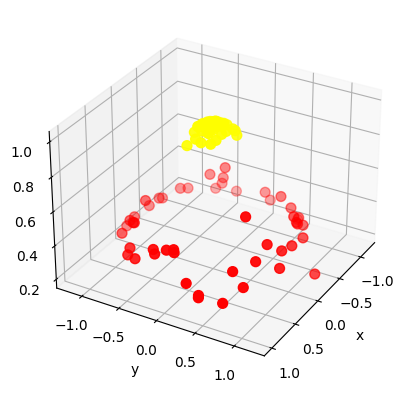

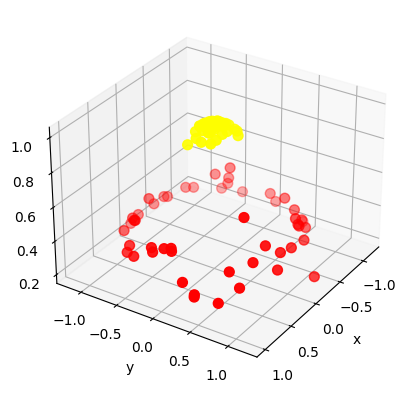

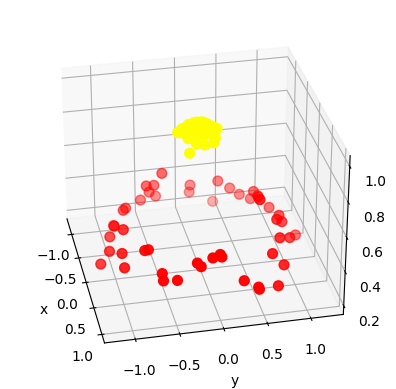

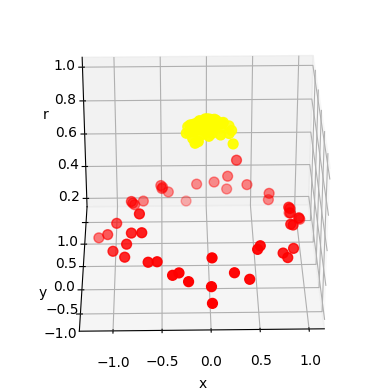

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    plt.show()

# Interaktif plot
interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azim=(-180, 180),
         X=fixed(X), y=fixed(y), r=fixed(np.sin(X[:, 0] + X[:, 1])))


In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

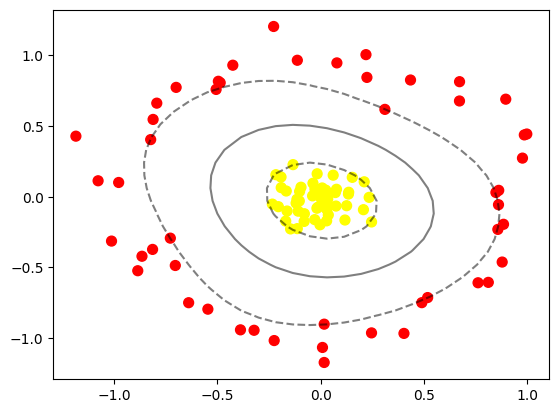

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

### **Data Overlap**


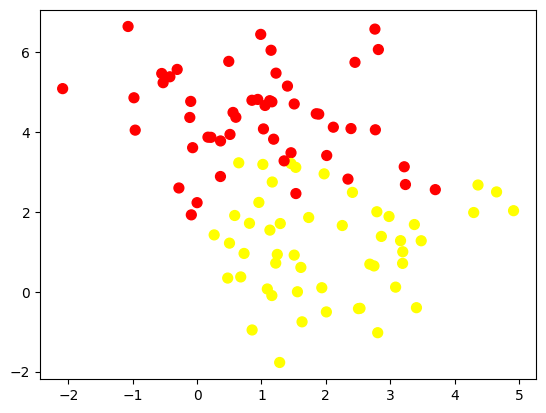

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

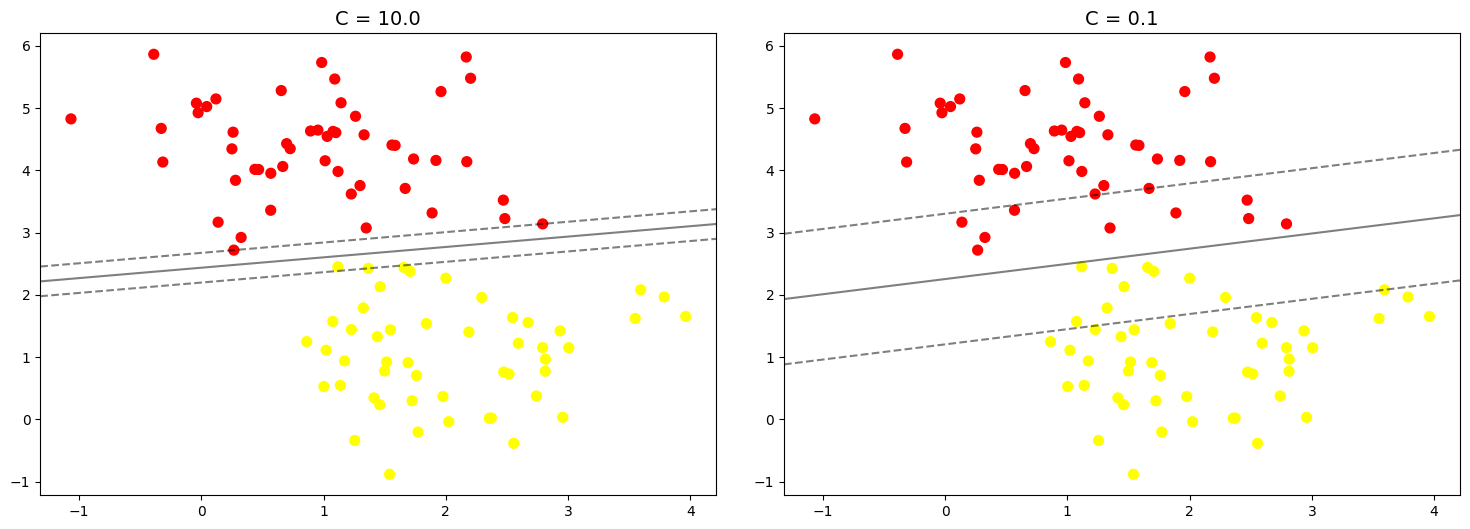

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# **PRAKTIKUM 2**

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


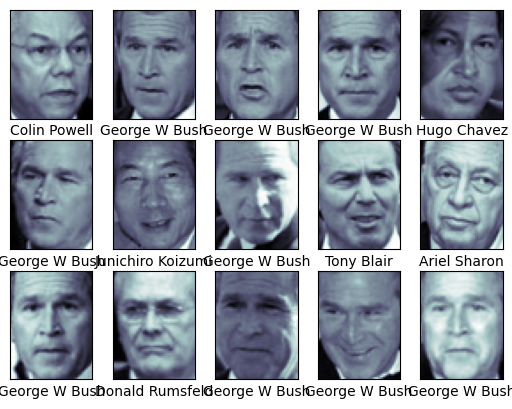

In [ ]:
# contoh wajah yang digunakan
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 32s, sys: 26.4 s, total: 1min 59s
Wall time: 1min 21s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

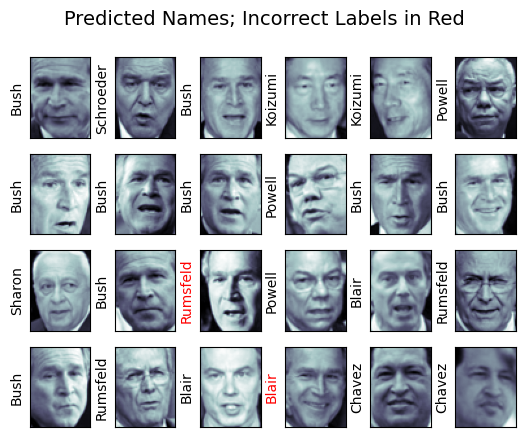

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

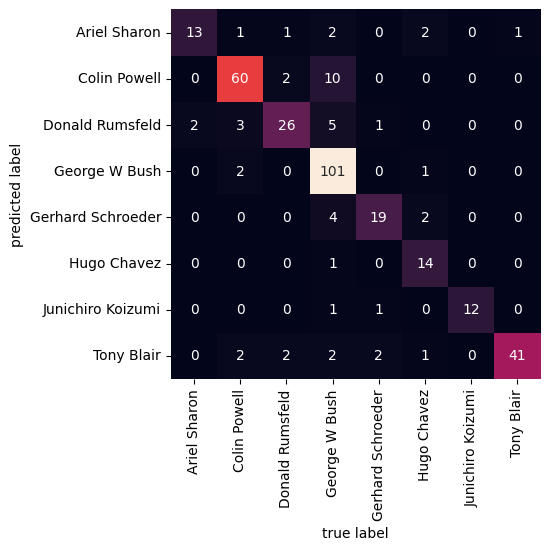

In [ ]:
# bentuk confusion matrix
import seaborn as sns

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# **PRAKTIKUM 3**

In [ ]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[252   7]
 [189  37]
 [146  73]
 [200  25]
 [  1 182]
 [ 24 156]
 [ 72 231]
 [ 50 212]
 [ 99 100]
 [  5 140]
 [191  72]
 [122  96]
 [ 22 133]
 [ 41 124]
 [ 83 160]
 [119  85]
 [159  18]
 [197  48]
 [ 93  60]
 [ 28 238]
 [ 76 123]
 [215 246]
 [ 83  57]
 [ 92  36]
 [ 38  38]
 [136 155]
 [118 157]
 [ 48  12]
 [ 35   2]
 [142 156]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


In [ ]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,252,7,0
1,189,37,0
2,146,73,0
3,200,25,0
4,1,182,0


In [ ]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,252,7,Kelas B
1,189,37,Kelas B
2,146,73,Kelas B
3,200,25,Kelas B
4,1,182,Kelas B


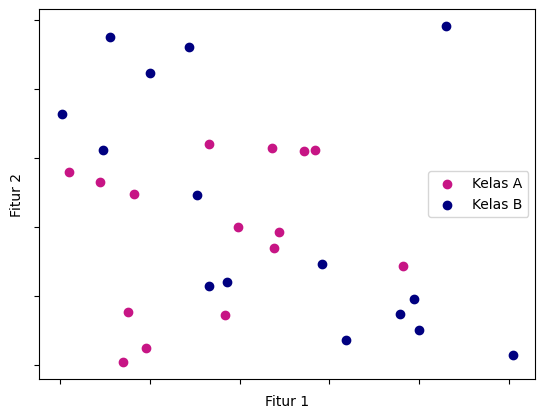

In [ ]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.5714285714285714
Hasil akurasi data test: 0.2222222222222222


In [ ]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.6190476190476191
Hasil akurasi data test (Gaussian): 0.4444444444444444


# **PRAKTIKUM 4**

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('CSV/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


In [ ]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
X = df['SMS'].values
y = df['Labels'].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

In [ ]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


In [ ]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')
# Menggunakan get_feature_names_out() untuk mendapatkan daftar fitur
feature_names = bow.get_feature_names_out()

# Menampilkan 100 fitur teratas secara vertikal
for feature in feature_names[:100]:
  print(feature)

7727
Dimensi data: (4457, 7727)
00
000
000pes
008704050406
0089
01223585334
0125698789
02
0207
02072069400
02073162414
021
03
04
0430
05
050703
0578
06
07
07008009200
07046744435
07090201529
07123456789
0721072
07732584351
07734396839
07742676969
07753741225
0776xxxxxxx
07781482378
07786200117
077xxx
07808
07808247860
07815296484
07821230901
07880867867
0789xxxxxxx
07946746291
0796xxxxxx
07973788240
07xxxxxxxxx
08
0800
08000407165
08000776320
08000839402
08000930705
08000938767
08001950382
08002888812
08002986030
08002986906
08002988890
08006344447
0808
08081263000
08081560665
0825
083
0844
08448350055
08448714184
0845
08452810071
08452810073
08452810075over18
0870
08700435505150p
08701213186
08701417012
08701417012150p
0870141701216
087016248
08701752560
087018728737
0870241182716
08702490080
08702840625
08704050406
08704439680
08704439680ts
08706091795
0870737910216yrs
08707500020
08707509020
08707808226
08708034412
08708800282
08709222922
0871
087104711148
08712101358
08712103738
08

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


# TUGAS PRAKTIKUM

## 1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Membaca data dari file CSV
df = pd.read_csv('CSV/voice.csv')

# Menampilkan beberapa baris pertama dari data
print(df.head())
# Menampilkan beberapa baris pertama dari data
print(df.head())

   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  

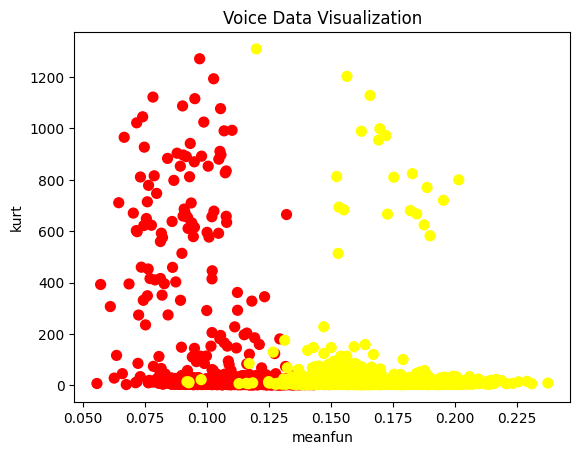

In [ ]:
import pandas as pd # Import the pandas library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Convert the data NumPy array to a Pandas DataFrame.
data = pd.DataFrame(df) # Convert data to DataFrame

# Memisahkan fitur dan label
X = data.drop('label', axis=1)
y = data['label']

# Membagi data menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inisiasi model SVM
clf = SVC(kernel='rbf', C=1.0, random_state=50)

# Melatih model
clf.fit(X_train, y_train)

# Memilih dua fitur untuk visualisasi
feature1 = 'meanfun'
feature2 = 'kurt'
X_vis = data[[feature1, feature2]].values

# Memetakan label ke angka
y_vis = data['label'].map({'male': 0, 'female': 1}).values

# Membuat scatter plot
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, s=50, cmap='autumn')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Voice Data Visualization')
plt.show()

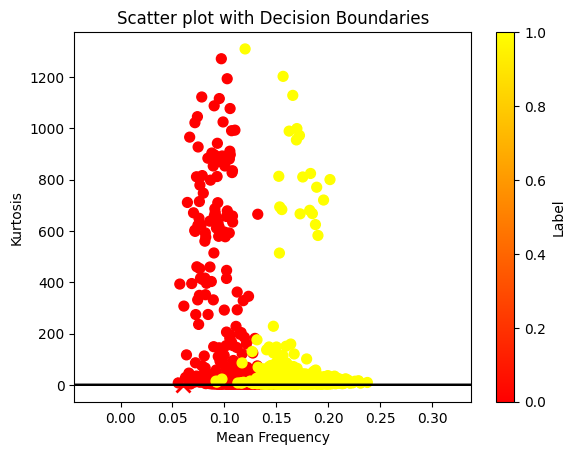

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Access the columns using bracket notation
xfit = np.linspace(data[feature1].min() - 0.1, data[feature1].max() + 0.1)

# Plotting
plt.scatter(data[feature1], data[feature2], c=y_vis, s=50, cmap='autumn')

# Menambahkan titik khusus jika diperlukan
plt.plot([0.06], [0.07], 'x', color='red', markeredgewidth=2, markersize=10)

# Menambahkan garis-garis keputusan (misalnya sebagai contoh)
for m, b in [(0.5, 0.1), (-0.3, 0.2), (0.1, -0.2)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlabel('Mean Frequency')
plt.ylabel('Kurtosis')
plt.title('Scatter plot with Decision Boundaries')
plt.xlim(data[feature1].min() - 0.1, data[feature1].max() + 0.1)
plt.colorbar(label='Label')  # Menambahkan colorbar untuk menunjukkan label
plt.show()

## 2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('CSV/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


In [ ]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
X = df['SMS'].values
y = df['Labels'].values

## 2. Fitur CountVectorizer dengan mengaktifkan stop_words

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer dengan stop_words diaktifkan
bow = CountVectorizer(stop_words='english')

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Kita tidak menginginkan model mengetahui parameter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)


In [ ]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')
# Menggunakan get_feature_names_out() untuk mendapatkan daftar fitur
feature_names = bow.get_feature_names_out()

# Menampilkan 100 fitur teratas secara vertikal
for feature in feature_names[:100]:
  print(feature)

7466
Dimensi data: (4457, 7466)
00
000
000pes
008704050406
0089
01223585334
0125698789
02
0207
02072069400
02073162414
021
03
04
0430
05
050703
0578
06
07
07008009200
07046744435
07090201529
07123456789
0721072
07732584351
07734396839
07742676969
07753741225
0776xxxxxxx
07781482378
07786200117
077xxx
07808
07808247860
07815296484
07821230901
07880867867
0789xxxxxxx
07946746291
0796xxxxxx
07973788240
07xxxxxxxxx
08
0800
08000407165
08000776320
08000839402
08000930705
08000938767
08001950382
08002888812
08002986030
08002986906
08002988890
08006344447
0808
08081263000
08081560665
0825
083
0844
08448350055
08448714184
0845
08452810071
08452810073
08452810075over18
0870
08700435505150p
08701213186
08701417012
08701417012150p
0870141701216
087016248
08701752560
087018728737
0870241182716
08702490080
08702840625
08704050406
08704439680
08704439680ts
08706091795
0870737910216yrs
08707500020
08707509020
08707808226
08708034412
08708800282
08709222922
0871
087104711148
08712101358
08712103738
08

## 3. Evaluasi *hasilnya*

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9829596412556054


In [ ]:
# Inisialisasi dan latih model SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_svm = svm_model.predict(X_test)


3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
Menggunakan data spam.csv
Fitur TF-IDF dengan mengaktifkan stop_words
Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# Baca file voice.csv
voice_data = pd.read_csv('CSV/voice.csv')

# Pisahkan fitur dan label
X = voice_data.drop('label', axis=1)
y = voice_data['label'].map({'male': 0, 'female': 1})

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Inisialisasi dan latih model SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_svm = svm_model.predict(X_test)


In [ ]:
# Evaluasi hasil model SVM
print("Accuracy SVM:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report SVM:\n", classification_report(y_test, y_pred_svm))


Accuracy SVM: 0.979372197309417

Classification Report SVM:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       0.99      0.86      0.92       161

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



## **spam.csv**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


In [ ]:
# Baca file spam.csv
spam_data = pd.read_csv('CSV/spam.csv', encoding='latin-1')

# Ambil kolom yang relevan
spam_data = spam_data[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'message'})
spam_data['label'] = spam_data['label'].map({'ham': 0, 'spam': 1})


In [ ]:
# Baca file spam.csv
spam_data = pd.read_csv('CSV/spam.csv', encoding='latin-1')

# Ambil kolom yang relevan
spam_data = spam_data[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'message'})
spam_data['label'] = spam_data['label'].map({'ham': 0, 'spam': 1})


In [ ]:
# Pisahkan fitur dan label
X = spam_data['message']
y = spam_data['label']

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Gunakan CountVectorizer dengan stop words
vectorizer = CountVectorizer(stop_words='english')
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)


In [ ]:
# Inisialisasi dan latih model Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_count, y_train)

# Prediksi pada data uji
y_pred_nb_count = nb_model.predict(X_test_count)


In [ ]:
# Evaluasi hasil model Naive Bayes dengan CountVectorizer
print("Accuracy Naive Bayes (CountVectorizer):", accuracy_score(y_test, y_pred_nb_count))
print("\nClassification Report (CountVectorizer):\n", classification_report(y_test, y_pred_nb_count))


Accuracy Naive Bayes (CountVectorizer): 0.9838565022421525

Classification Report (CountVectorizer):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



C. Model Klasifikasi Multinomial Naive Bayes dengan TF-IDF untuk Data Spam

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Gunakan TfidfVectorizer dengan stop words
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
# Inisialisasi dan latih model Naive Bayes dengan TF-IDF
nb_model_tfidf = MultinomialNB()
nb_model_tfidf.fit(X_train_tfidf, y_train)

# Prediksi pada data uji
y_pred_nb_tfidf = nb_model_tfidf.predict(X_test_tfidf)


In [ ]:
# Evaluasi hasil model Naive Bayes dengan TF-IDF
print("Accuracy Naive Bayes (TF-IDF):", accuracy_score(y_test, y_pred_nb_tfidf))
print("\nClassification Report (TF-IDF):\n", classification_report(y_test, y_pred_nb_tfidf))


Accuracy Naive Bayes (TF-IDF): 0.9668161434977578

Classification Report (TF-IDF):
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



D. Perbandingan dan Kesimpulan

Setelah menjalankan model klasifikasi dengan CountVectorizer dan TF-IDF, bandingkan hasilnya berdasarkan:

Accuracy

Precision

Recall

F1-Score

Kesimpulan:

Accuracy Naive Bayes (CountVectorizer): 0.9838565022421525

Accuracy Naive Bayes (TF-IDF): 0.9668161434977578

dapat disimpulkan bahwa akurasi fitur CountVectorizer lebih akurat untuk dataset spam.csv dibandingkan fitur TF-IDF
